In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing  import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')





In [2]:
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.899139
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.069626
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.981300


In [3]:
df.shape

(2003, 6)

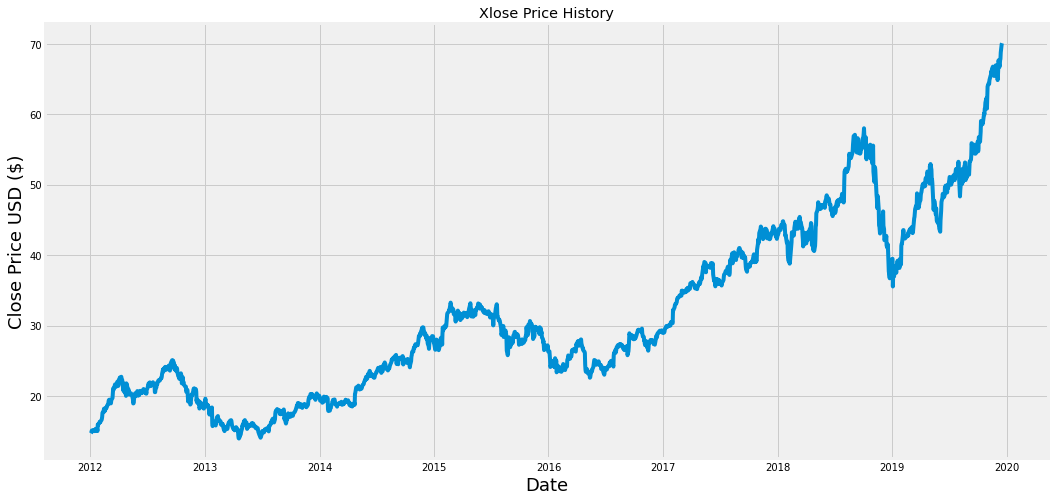

In [4]:
plt.figure(figsize=(16,8))
plt.title('Xlose Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
dataset =  data.values
training_data_len = math.ceil(len(dataset) *.8)
training_data_len

1603

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [7]:
# create the traningh datat sest 
# scaled traning data set 
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [9]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1543, 60, 1)

In [10]:
 model = Sequential()
 model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
 model.add(LSTM(50, return_sequences= False ))
 model.add(Dense(25))
 model.add(Dense(1 ))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train,batch_size=1, epochs=1) 

1543/1543 [==============================] - 38s 23ms/step - loss: 0.0030


In [26]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [27]:


x_test = np.array(x_test)
print(x_test)


[[0.51322235 0.51958863 0.53294452 ... 0.58926183 0.58164901 0.58939538]
 [0.51958863 0.53294452 0.54839284 ... 0.58164901 0.58939538 0.5840976 ]
 [0.53294452 0.54839284 0.54581069 ... 0.58939538 0.5840976  0.58107023]
 ...
 [0.7353308  0.72095091 0.72535838 ... 0.94688811 0.95708301 0.96015487]
 [0.72095091 0.72535838 0.7207283  ... 0.95708301 0.96015487 0.97658263]
 [0.72535838 0.7207283  0.7356424  ... 0.96015487 0.97658263 0.99755134]]


In [29]:

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

In [31]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [33]:
#Get th eroot mean squred error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5658634567260742

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


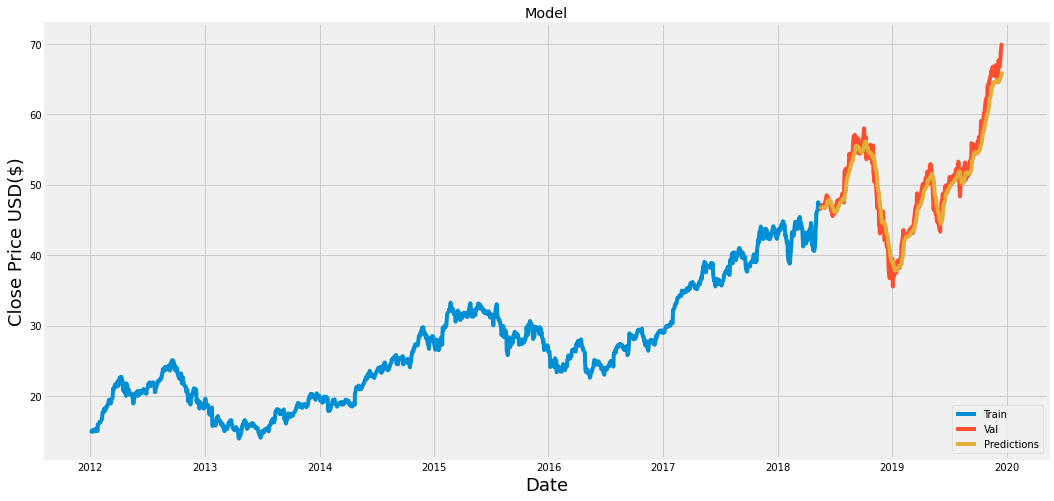

In [45]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize= (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize =18)
plt.ylabel('Close Price USD($)',fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc= 'lower right')
plt.show()

In [47]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.569832
2018-05-18,46.577499,46.666763
2018-05-21,46.907501,46.694725
2018-05-22,46.790001,46.717613
2018-05-23,47.090000,46.722328
...,...,...
2019-12-11,67.692497,64.979912
2019-12-12,67.864998,65.175156
2019-12-13,68.787498,65.388145


In [50]:
#get 
apple_quote = web.DataReader('AAPL', data_source= 'yahoo',start= '2012-01-01',end= '2019-12-17')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[66.52674]]


In [51]:
apple_quote2 = web.DataReader('AAPL', data_source= 'yahoo',start= '2019-12-18',end= '2019-12-18')

print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
